In [41]:
from google.colab import files
import pandas as pd

uploaded = files.upload()

data = pd.read_csv("news.csv")

data

Saving news.csv to news (2).csv


,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
...,...,...,...,...
6330,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL
6331,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
6332,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE
6333,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL


In [42]:
# sklearn library for tfidf vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# sklearn libraries for models and evaulation metrics
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
)

# nltk for preprocessing
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# matpilotlib and seaborn libraries for visualize
import matplotlib.pyplot as plt
import seaborn as sns

# download nltk datasets
nltk.download("stopwords", quiet=True)
nltk.download("punkt", quiet=True)
nltk.download('punkt_tab', quiet=True)
nltk.download("wordnet", quiet=True)

print("Libraries and NLTK datasets loaded!")

Libraries and NLTK datasets loaded!


In [46]:
# we assign data = our dataset and drop the columns and empty rows that we will not use
data = pd.read_csv("news.csv")
data = data.drop(["title", "Unnamed: 0"], axis=1)
data = data.dropna()

# stopwords and lemmatizer assigned
stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()

# text preprocessing for lowercase, tokenize, removal stopwords, punkt and non alpha char
def preprocess_text(text):
    # lowercase text
    text = text.lower()
    # tokenize text
    tokens = word_tokenize(text)
    # removal stopwords, punkt and non alpha char
    clean_tokens = [
        lemmatizer.lemmatize(word) for word in tokens if word.isalpha() and word not in stop_words
    ]
    # reconstruct tokens
    return " ".join(clean_tokens)

# create new col for cleaned text
data["cleaned_text"] = data["text"].apply(preprocess_text)

data[["text", "cleaned_text", "label"]]

,text,cleaned_text,label
0,"Daniel Greenfield, a Shillman Journalism Fello...",daniel greenfield shillman journalism fellow f...,FAKE
1,Google Pinterest Digg Linkedin Reddit Stumbleu...,google pinterest digg linkedin reddit stumbleu...,FAKE
2,U.S. Secretary of State John F. Kerry said Mon...,secretary state john kerry said monday stop pa...,REAL
3,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",kaydee king kaydeeking november lesson tonight...,FAKE
4,It's primary day in New York and front-runners...,primary day new york hillary clinton donald tr...,REAL
...,...,...,...
6330,The State Department told the Republican Natio...,state department told republican national comm...,REAL
6331,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,p pb stand plutocratic pentagon posted oct wik...,FAKE
6332,Anti-Trump Protesters Are Tools of the Oligar...,protester tool oligarchy always provokes rage ...,FAKE
6333,"ADDIS ABABA, Ethiopia —President Obama convene...",addis ababa ethiopia obama convened meeting le...,REAL


In [44]:
# TF-IDF vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # we get maximum 5000 feature/word for tf idf
X = tfidf_vectorizer.fit_transform(data["cleaned_text"]).toarray()  # TF-IDF feature matrix
y = data["label"].map({"REAL": 0, "FAKE": 1})  # we assigned the labels as 1 and 0, 0 for real, 1 for fake, we will use boolean logic

# we divide 80% of the vectorized data we obtain for the training set and 20% for the test set
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Feature extraction and dataset splitting with TF-IDF completed!")
print(f"Training set size: {X_train.shape}, Test set size: {X_test.shape}")

Feature extraction and dataset splitting with TF-IDF completed!
Training set size: (5068, 5000), Test set size: (1267, 5000)


                 Model  Accuracy  Precision    Recall  F1-Score
0          Naive Bayes  0.876085   0.870717  0.883096  0.876863
1  Logistic Regression  0.914759   0.897126  0.936809  0.916538



--- Naive Bayes Classifier ---
Accuracy: 0.8761
Precision: 0.8707
Recall: 0.8831
F1-Score: 0.8769

Confusion Matrix:


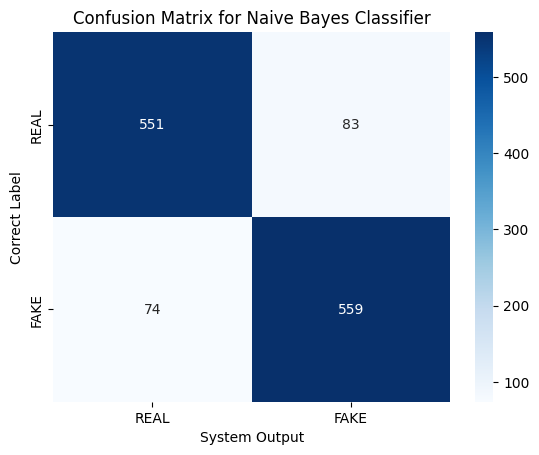

--- Logistic Regression ---
Accuracy: 0.9148
Precision: 0.8971
Recall: 0.9368
F1-Score: 0.9165

Confusion Matrix:


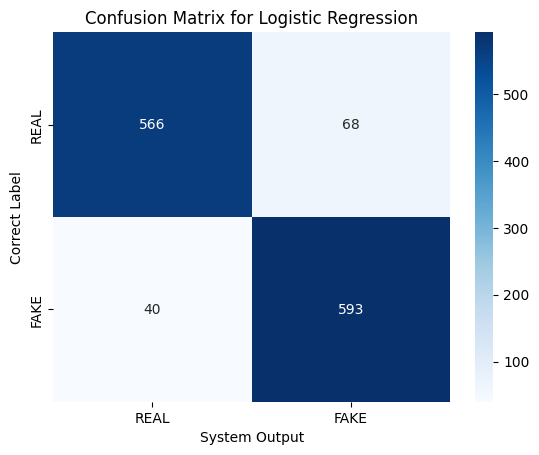

In [45]:
# naive bayes classifier
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)  # model training
y_pred_nb = nb_model.predict(X_test)  # system outputs

# logistic regression classifier
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train, y_train)  # model training
y_pred_lr = lr_model.predict(X_test)  # system outputs

# evaluation metrics
def evaluate_model(y_true, y_pred, model_name):
    print(f"--- {model_name} ---")
    print(f"Accuracy: {accuracy_score(y_true, y_pred):.4f}")
    print(f"Precision: {precision_score(y_true, y_pred):.4f}")
    print(f"Recall: {recall_score(y_true, y_pred):.4f}")
    print(f"F1-Score: {f1_score(y_true, y_pred):.4f}")
    print("\nConfusion Matrix:")
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["REAL", "FAKE"], yticklabels=["REAL", "FAKE"])
    plt.xlabel("System Output")
    plt.ylabel("Correct Label")
    plt.title(f"Confusion Matrix for {model_name}")
    plt.show()

results = {
    "Model": ["Naive Bayes", "Logistic Regression"],
    "Accuracy": [accuracy_score(y_test, y_pred_nb), accuracy_score(y_test, y_pred_lr)],
    "Precision": [precision_score(y_test, y_pred_nb), precision_score(y_test, y_pred_lr)],
    "Recall": [recall_score(y_test, y_pred_nb), recall_score(y_test, y_pred_lr)],
    "F1-Score": [f1_score(y_test, y_pred_nb), f1_score(y_test, y_pred_lr)],
}

results_df = pd.DataFrame(results)
print(results_df)
print("\n\n")

# naive bayes evaluation
evaluate_model(y_test, y_pred_nb, "Naive Bayes Classifier")

# logistic regression evaluation
evaluate_model(y_test, y_pred_lr, "Logistic Regression")